In [2]:
import pandas as pd
import glob
import numpy as np
import json
import math
from natsort import natsorted

In [3]:
data = pd.read_json("/home/ravi/raviProject/DATA/Annotate/remaining_V1.json", orient='records')

In [4]:
data.shape

(2291110, 5)

In [5]:
data.head(5)

,msgDate,msg,replyDate,reply,telegramChannel
0,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611532985,"Keep on keepin’ on. May the Trinity, the Fathe...",AlexJones.json
1,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611538372,They are really messing with the signal right ...,AlexJones.json
2,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611540892,,AlexJones.json
3,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611541436,Wow comments are on.,AlexJones.json
4,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611542543,The other day when I called in and spoke with ...,AlexJones.json


In [6]:
df = data.copy()

In [7]:
sampled_df = df.sample(n=10000, replace=False, random_state=42)

In [8]:
sampled_df.shape

(10000, 5)

In [9]:
sampled_df.head(5)

,msgDate,msg,replyDate,reply,telegramChannel
1050863,1662532819,What are your thoughts on this? 🤔,1662534399,Psychopath.,ResisttheMainstream.json
983114,1666491599,"At 9pm eastern, each night, those in jail for ...",1666492338,I can understand why Trump wouldn’t sing into ...,PrayingMedic.json
1416730,1684960820,🔴 Kayleigh McEnany Reveals How She Thinks DeSa...,1685043545,,ResisttheMainstream.json
1263950,1674411617,,1674415001,Is this an IQ test?,ResisttheMainstream.json
800675,1693834316,t h i s m u s t b e h o w o p p e n h ...,1693834929,lol,LacansWhreHouse.json


In [10]:
sampled_df.to_json('/home/ravi/raviProject/DATA/Annotate/sampled_V2_10K.json', orient='records')

In [11]:
# sampled_df=pd.read_json('/home/ravi/raviProject/DATA/Annotate/sampled_V1.json', orient='records')
# # Save DataFrame as JSONL (JSON Lines)
# with open('/home/ravi/raviProject/DATA/Annotate/sampled_V1.jsonl', 'w') as f:
#     sampled_df.to_json(f, orient='records', lines=True)

In [12]:
remaining_df = df.drop(sampled_df.index)

In [13]:
remaining_df.shape

(2281110, 5)

In [14]:
remaining_df.to_json('/home/ravi/raviProject/DATA/Annotate/remaining_V2.json', orient='records')

In [15]:
remaining_df.head(5)

,msgDate,msg,replyDate,reply,telegramChannel
0,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611532985,"Keep on keepin’ on. May the Trinity, the Fathe...",AlexJones.json
1,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611538372,They are really messing with the signal right ...,AlexJones.json
2,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611540892,,AlexJones.json
3,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611541436,Wow comments are on.,AlexJones.json
4,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611542543,The other day when I called in and spoke with ...,AlexJones.json


# sample ~100 per class wrt model predictions

In [3]:
df = pd.read_json('/home/ravi/raviProject/DATA/Annotate/sampled_V2_10K_yPred_RoBERTa.json', orient='records')

In [13]:
df['y_pred'].value_counts()

0    8725
2     766
1     509
Name: y_pred, dtype: int64

In [4]:
df.head()

,msgDate,msg,replyDate,text,telegramChannel,y_pred
0,1662532819,What are your thoughts on this? 🤔,1662534399,Psychopath.,ResisttheMainstream.json,0
1,1666491599,"At 9pm eastern, each night, those in jail for ...",1666492338,I can understand why Trump wouldn’t sing into ...,PrayingMedic.json,0
2,1684960820,🔴 Kayleigh McEnany Reveals How She Thinks DeSa...,1685043545,,ResisttheMainstream.json,0
3,1674411617,,1674415001,Is this an IQ test?,ResisttheMainstream.json,0
4,1693834316,t h i s m u s t b e h o w o p p e n h ...,1693834929,lol,LacansWhreHouse.json,0


In [6]:
# sample 100 per class
sampled_data_200 = df.groupby('y_pred').apply(lambda x: x.sample(n=200, random_state=42)).reset_index(drop=True)
# Drop the sampled rows from the original DataFrame to get the remaining rows
remaining_data = df.drop(sampled_data_200.index)

In [7]:
remaining_data.to_json('/home/ravi/raviProject/DATA/Annotate/sampled_V2_10K_yPred_RoBERTa_remaining9400.json', orient='records')
sampled_data_200.to_json('/home/ravi/raviProject/DATA/Annotate/sampled_V2_10K_yPred_RoBERTa_Sampled600WithYpred.json', orient='records')
sampled_data_200 = sampled_data_200.drop(columns=['y_pred'])
sampled_data_200.to_csv('/home/ravi/raviProject/DATA/Annotate/sampled_V2_10K_yPred_RoBERTa_Sampled600WithoutYpred.csv')

In [14]:
# sample 100 per class
sampled_data_500 = df.groupby('y_pred').apply(lambda x: x.sample(n=500, random_state=42)).reset_index(drop=True)
# Drop the sampled rows from the original DataFrame to get the remaining rows
remaining_data_500 = df.drop(sampled_data_500.index)

In [15]:
remaining_data_500.to_json('/home/ravi/raviProject/DATA/Annotate/sampled_V2_10K_yPred_RoBERTa_remaining8500.json', orient='records')
sampled_data_500.to_json('/home/ravi/raviProject/DATA/Annotate/sampled_V2_10K_yPred_RoBERTa_Sampled1500WithYpred.json', orient='records')
sampled_data_500 = sampled_data_500.drop(columns=['y_pred'])
sampled_data_500.to_csv('/home/ravi/raviProject/DATA/Annotate/sampled_V2_10K_yPred_RoBERTa_Sampled1500WithoutYpred.csv')

# Compare Labels

In [49]:
V2GPT=pd.read_json('/home/ravi/raviProject/DATA/Annotate/sampled_V2_10K_yPred_RoBERTa_Sampled1500WithYpred.json', orient='records')

In [50]:
# Replace values in column 'FinalLabel'
replacement_dict = {0 : 1, 1 : 2, 2 : 3}
V2GPT['y_pred'] = V2GPT['y_pred'].replace(replacement_dict)

In [51]:
V2GPT.head()

,msgDate,msg,replyDate,text,telegramChannel,y_pred
0,1649122203,​ Obama's White House Now At The Center Of The...,1649122460,Dirty dogs,TrumpSupportersChannel.json,1
1,1650201789,President Trump embraces a 100 year old WWII V...,1650213734,Beautiful heart 💞,TrumpSupportersChannel.json,1
2,1662489071,Unearthed Clip Completely Exposes Top January ...,1662505438,I was talking with you about crypto and for so...,TheTrumpRepublicans.json,1
3,1656271817,This is spot on.\n\n @TrumpChannel,1656441649,Hooray - one good minded citizen!!! God bless ...,TrumpSupportersChannel.json,1
4,1635459366,,1635459451,Good one 😆,PatriotStreetfighter.json,1


In [52]:
V2Ravi=pd.read_csv('/home/ravi/raviProject/DATA/Annotate/LabelV2/sampled_V2_10K_yPred_RoBERTa_Sampled1500WithoutYpred_RaviLabel.csv')

In [53]:
V2Ravi.head()

,Unnamed: 0,msgDate,msg,replyDate,text,telegramChannel,Rlabel
0,0,1649122203,​ Obama's White House Now At The Center Of The...,1649122460,Dirty dogs,TrumpSupportersChannel.json,1.0
1,1,1650201789,President Trump embraces a 100 year old WWII V...,1650213734,Beautiful heart 💞,TrumpSupportersChannel.json,1.0
2,2,1662489071,Unearthed Clip Completely Exposes Top January ...,1662505438,I was talking with you about crypto and for so...,TheTrumpRepublicans.json,1.0
3,3,1656271817,This is spot on.\n\n @TrumpChannel,1656441649,Hooray - one good minded citizen!!! God bless ...,TrumpSupportersChannel.json,1.0
4,4,1635459366,NaN,1635459451,Good one 😆,PatriotStreetfighter.json,1.0


In [74]:
V2Labels=V2GPT.copy()
V2Labels['RLabel']=V2Ravi['Rlabel']
V2Labels = V2Labels.dropna(subset=['RLabel'], axis=0)
V2Labels['RLabel']=V2Labels['RLabel'].astype('int64')

In [75]:
V2Labels['RLabel'].value_counts()

1    1185
2     152
3     120
Name: RLabel, dtype: int64

In [79]:
V2Labels['y_pred'].value_counts()

3    500
2    495
1    462
Name: y_pred, dtype: int64

## score

In [54]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report, f1_score, accuracy_score


In [18]:
# Sample 100 rows per class
sampled_df = V2Labels.groupby('RLabel').apply(lambda x: x.sample(n=100, random_state=42)).reset_index(drop=True)
# Save remaining rows to another DataFrame
remaining_df = V2Labels[~V2Labels.index.isin(sampled_df.index)]

NameError: name 'V2Labels' is not defined

In [95]:
len(sampled_df), len(remaining_df)

(300, 1174)

In [97]:
remaining_df['RLabel'].value_counts()

1    906
2    149
3    119
Name: RLabel, dtype: int64

In [40]:
sampled_df=pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV2/V2_Labeled_300_sampled.json', orient='records')

In [42]:
sampled_df.head(1)

,msgDate,msg,replyDate,text,telegramChannel,y_pred,RLabel
0,1622155600,This man needs serious help.\n,1622168885,Whatta LOSER,AnalyzingAmerica.json,1,1


In [43]:
kappa = cohen_kappa_score(sampled_df['RLabel'], sampled_df['y_pred'])

In [44]:
kappa

0.645

In [45]:
weighted_f1 = f1_score(sampled_df['RLabel'], sampled_df['y_pred'], average='weighted')

In [46]:
weighted_f1

0.7406976107811848

In [56]:
acc = accuracy_score(sampled_df['RLabel'], sampled_df['y_pred'])

In [57]:
acc

0.7633333333333333

In [51]:
# Generate classification report
class_report = classification_report(sampled_df['RLabel'], sampled_df['y_pred'])

In [53]:
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.42      0.58       100
           2       0.72      0.99      0.84       100
           3       0.75      0.88      0.81       100

    accuracy                           0.76       300
   macro avg       0.80      0.76      0.74       300
weighted avg       0.80      0.76      0.74       300



In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

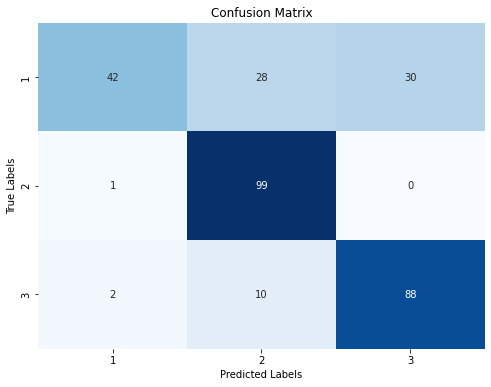

In [94]:
conf_matrix=confusion_matrix(sampled_df['RLabel'], sampled_df['y_pred'])
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Set the tick labels to match your class labels (1, 2, 3)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=[1, 2, 3])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=[1, 2, 3])

plt.show()

In [96]:
sampled_df.to_json('/home/ravi/raviProject/DATA/Annotate/LabelV2/V2_Labeled_300_sampled.json', orient='records')
remaining_df.to_json('/home/ravi/raviProject/DATA/Annotate/LabelV2/V2_Labeled_1174_remaining.json', orient='records')

# MERGE with previous labeled set

In [3]:
v1df=pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV1/V1_Labeled_300_sampled.json', orient='records')

In [4]:
# Replace values in column 'FinalLabel'
replacement_dict = {0 : 1, 1 : 2, 2 : 3}
v1df['FinalLabel'] = v1df['FinalLabel'].replace(replacement_dict)

In [5]:
v1df['FinalLabel'].value_counts()

1    100
2    100
3    100
Name: FinalLabel, dtype: int64

In [6]:
v1df.head(1)

,Unnamed: 0,id,text,msg,msgDate,replyDate,comparison_MJ,telegramChannel,LabelName,LabelM,LabelR,Agree?,FinalLabel
0,436,8632,Sounds like their trying to kill off the other...,This is so wrong.\n,1641745947,1641755795,True,AnalyzingAmerica.json,['No threat / Ambiguous'],1,1,Equal,1


In [7]:
v2df = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV2/V2_Labeled_300_sampled.json', orient='records')
v2df['FinalLabel']=v2df['RLabel']

In [8]:
v2df['FinalLabel'].value_counts()

1    100
2    100
3    100
Name: FinalLabel, dtype: int64

In [9]:
v2df.head(1)

,msgDate,msg,replyDate,text,telegramChannel,y_pred,RLabel,FinalLabel
0,1622155600,This man needs serious help.\n,1622168885,Whatta LOSER,AnalyzingAmerica.json,1,1,1


In [10]:
selected_cols =['msgDate', 'msg', 'replyDate', 'text', 'telegramChannel', 'FinalLabel']
merged_df = pd.concat([v1df[selected_cols], v2df[selected_cols]], ignore_index=True)

In [11]:
merged_df.head(1)

,msgDate,msg,replyDate,text,telegramChannel,FinalLabel
0,1641745947,This is so wrong.\n,1641755795,Sounds like their trying to kill off the other...,AnalyzingAmerica.json,1


In [12]:
merged_df['FinalLabel'].value_counts()

1    200
2    200
3    200
Name: FinalLabel, dtype: int64

In [13]:
# Replace values in column 'FinalLabel'
replacement_dict = {1 : 0, 2 : 1, 3 : 2}
merged_df['FinalLabel'] = merged_df['FinalLabel'].replace(replacement_dict)

In [15]:
merged_df['FinalLabel'].value_counts()

0    200
1    200
2    200
Name: FinalLabel, dtype: int64

In [14]:
merged_df.to_json('/home/ravi/raviProject/DATA/Annotate/iterData/iter2_Labeled_600_sampled.json', orient='records')